In [2]:
import pandas as pd

df = pd.read_pickle('C:/Users/Rafael/OneDrive/Documentos/TCC Rafaela/Dados/Pickle/cancer_mama_regiao_sudeste_sem_nulos.pickle')

In [3]:
# Função para limitar a dois primeiros números
df['AP_MUNPCN'] = df['AP_MUNPCN'].apply(lambda x: int(str(x)[:2]))
df['AP_UFMUN'] = df['AP_UFMUN'].apply(lambda x: int(str(x)[:2]))

# Dicionário de códigos da Unidade da Federação para siglas dos estados
uf_dict = {
    11: 'RO', 12: 'AC', 13: 'AM', 14: 'RR', 15: 'PA', 16: 'AP', 17:'TO',   
    21: 'MA', 22: 'PI', 23: 'CE', 24: 'RN', 25:'PB', 26:'PE', 27: 'AL', 28:'SE', 29: 'BA', 
    31: 'MG', 32: 'ES', 33: 'RJ', 35: 'SP',
    41: 'PR',  42: 'SC', 43: 'RS', 
    50:'MS', 51:'MT', 52: 'RS', 53: 'DF'
}

# Substituindo os códigos pelos valores de sigla do estado
df['AP_MUNPCN'] = df['AP_MUNPCN'].map(uf_dict)
df['AP_UFMUN'] = df['AP_UFMUN'].map(uf_dict)


valores_unicos = df['AP_MUNPCN'].unique()
print(valores_unicos)




['ES' 'MG' 'BA' 'RJ' 'SC' 'RO' 'AL' 'SP' 'PR' 'RS' 'CE' 'RR' 'PA' 'MS'
 'RN' 'MT' 'MA' 'AC' 'SE' 'DF' 'TO' 'PE' 'PI' 'AM' 'PB' 'AP']


In [26]:
# Verificar a quantidade de valores únicos na coluna 'AP_RACACOR'
quantidade_unicos = df['AQ_GRAHIS'].unique()

# Exibir a quantidade de valores únicos
print(quantidade_unicos)


['GX' 'G2' 'G3' 'G1' 'G4' '1' '4' '3' '2' '7' '5' '6' '04' '9' '10' '8'
 '11' '0' '03' '06' '01' '02' '09' '00' 'II' 'I' 'X' '20' 'Nã' '07' 'SG'
 'G' 'GH' 'B2' '2B' 'S' 'X0' '22' '08' '30' '31' '3C' '27' '60' 'N' 'G6'
 'B1' 'XX' 'O' 'G0' 'A' '05' '12' 'B' 'A2' '24' '32' '2S' '21' '3]' 'AL'
 '2A' 'C2' 'G7' '25' 'GL' '1A' 'S0' '3A' '23' '33' '2N' 'Ba' '0,' ',0'
 '52' 'Al' 'NT' '16' 'C' '26' 'M¿' '71' 'CH' '40' '91' '14' 'Desconhecido'
 'BX' 'IV' '28' '81' 'OO' 'GI' '13' '4G' '0X' '3G' 'BA' 'GG' '0-' 'X2'
 'NI' 'N0' '50' 'X3' '99' 'G8' '0I' '18' '??' '29' '19' '--' '41' '4N' '.'
 '15' '42' 'GE' '61' 'I0' '-' 'C1' '1S' 'D2' 'T4' '43' ',2' '17' '1N' '2,'
 'N1' 'V' ',' '1I' '2G' '62' '1G' '35' 'IA' '3B' 'F1' 'XS' 'X1' '51' '-*'
 'N3' 'GT' 'G5' 'X4' 'G9' '.X' '80' '63' 'Z' '2X' 'C5' 'F2' 'GC' '36' ',4'
 'CA' '1X' '..' 'T2' 'EC' 'E' '4A' '49' 'g' 'GZ' 'HX' 'AD' '9*' 'BD' 'PD'
 'GR' 'ad' 'NE' 'Ad' 'X.' 'EG' 'GJ' 'HE' 'gr' 'MO' 'M' 'AG' '44' 'MD' 'NO'
 'T1' 'MA' '90' 'TA' 'SC' 'B3' 'GV' 'DG' 'GN

In [23]:

# Visualizar os 5 primeiros valores da coluna 'a'
print(df['Ano'].head())

7     2008
12    2008
13    2008
15    2008
23    2008
Name: Ano, dtype: object


In [ ]:
# Passo 1: Extraímos o ano da coluna 'ano_mes'
df['Ano'] = df['AP_DTINIC'].astype(str).str[:4]

# Passo 2: Agrupar por ano e listar os graus histopatológicos
tabela_agrupada = df.groupby(['Ano']).agg(
    graus_histopatologicos=('AQ_GRAHIS', lambda x: list(x.unique()))
).reset_index()

# Exibir o resultado
print(tabela_agrupada)

     Ano                             graus_histopatologicos
0   2008  [GX, G2, G3, G1, G4, 03, 06, 01, 02, 09, 00, 4...
1   2009  [G3, G2, GX, G1, G4, 1, 4, 3, 2, 00, 03, 02, 0...
2   2010  [GX, G1, G2, 1, 4, 3, G3, 2, G4, 7, 02, 0, II,...
3   2011  [4, GX, G2, G1, G3, 1, 3, 2, G4, 7, 02, 15, 03...
4   2012  [G2, GX, 2, 3, 1, G3, 4, G1, G4, 02, 01, 00, 0...
5   2013  [2, 1, GX, G2, G3, 4, 3, G1, G4, 5, 01, 02, 03...
6   2014  [3, GX, 1, G2, G3, 4, 2, G1, 10, 9, 02, 8, 03,...
7   2015  [GX, 2, G1, 3, G3, 1, G2, G4, 4, 5, 6, 7, 0, 0...
8   2016  [3, 4, 1, G3, GX, G2, 2, G1, 5, 6, G4, 0, 03, ...
9   2017  [GX, G2, 3, G3, 4, 1, 2, G1, 5, 6, G4, 03, 01,...
10  2018  [GX, 3, 4, G2, 1, G3, 2, G1, 5, 6, G4, 9, 02, ...
11  2019  [G2, GX, 3, 4, 1, 2, G3, G1, 6, 5, 04, 8, 03, ...
12  2020  [GX, 3, 1, 2, 4, G3, G2, G1, 6, 5, G4, 9, G6, ...
13  2021  [G2, 2, 3, G3, 1, G1, GX, 5, 4, G4, 6, 9, 01, ...
14  2022  [3, GX, G2, 1, 4, 2, G3, G1, 5, G4, 6, 9, 10, ...
15  2023  [G3, 3, 2, 5, G2, GX, 4, 1, G1

In [30]:
# Criar o arquivo CSV a partir da tabela agrupada
tabela_agrupada.to_csv('C:/Users/Rafael/OneDrive/Documentos/TCC Rafaela/CSV de Análise/tabela_agrupada.csv', index=False)

# Mensagem para confirmar que o arquivo foi criado
print("Arquivo CSV criado com sucesso!")


Arquivo CSV criado com sucesso!


In [32]:

# Passo 2: Agrupar por ano e listar os graus histopatológicos
tabela_agrupada = df.groupby(['AP_UFMUN']).agg(
    graus_histopatologicos=('AQ_GRAHIS', lambda x: list(x.unique()))
).reset_index()

# Exibir o resultado
print(tabela_agrupada)

  AP_UFMUN                             graus_histopatologicos
0       ES  [GX, G2, G3, G1, G4, 1, 4, 3, 2, 7, 5, 6, 04, ...
1       MG  [01, 03, 2, 02, 1, G1, G2, GX, 00, G3, 3, 0, X...
2       RJ  [03, 02, G2, 00, G1, GX, ND, 3, 2, 1, 12, 4, X...
3       SP  [03, 06, 01, G2, G1, 02, 09, G3, 00, GX, 4, 10...


In [33]:
# Criar o arquivo CSV a partir da tabela agrupada
tabela_agrupada.to_csv('C:/Users/Rafael/OneDrive/Documentos/TCC Rafaela/CSV de Análise/tabela_agrupada_estado.csv', index=False)

# Mensagem para confirmar que o arquivo foi criado
print("Arquivo CSV criado com sucesso!")


Arquivo CSV criado com sucesso!


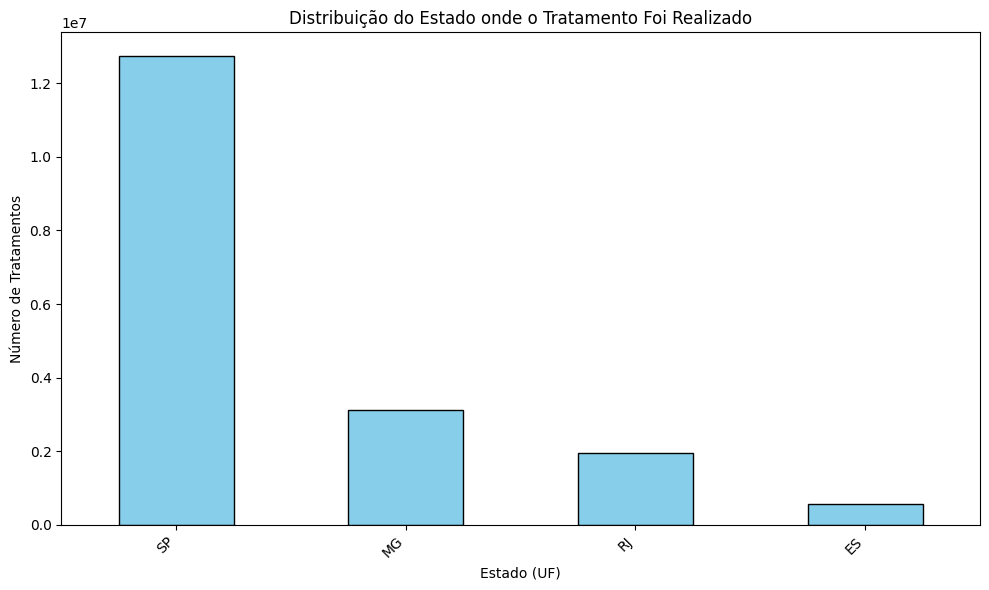

In [4]:
import matplotlib.pyplot as plt

# Contagem de quantos tratamentos ocorreram em cada estado (UF)
estado_count = df['AP_UFMUN'].value_counts()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
estado_count.plot(kind='bar', color='skyblue', edgecolor='black')

# Definindo o título e os rótulos
plt.title('Distribuição do Estado onde o Tratamento Foi Realizado')
plt.xlabel('Estado (UF)')
plt.ylabel('Número de Tratamentos')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Ajustando a rotação das labels para evitar sobreposição
plt.tight_layout()  # Ajuste para evitar o corte de labels

# Exibindo o gráfico
plt.show()